In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

In [3]:
vaccination_by_manufacturer[vaccination_by_manufacturer["is_western_europe"]]["country"].unique()

array(['Belgium', 'France', 'Ireland', 'Luxembourg', 'Netherlands'],
      dtype=object)

## Distribution of Manufacturers

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\3998938153.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\3998938153.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\3998938153.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)


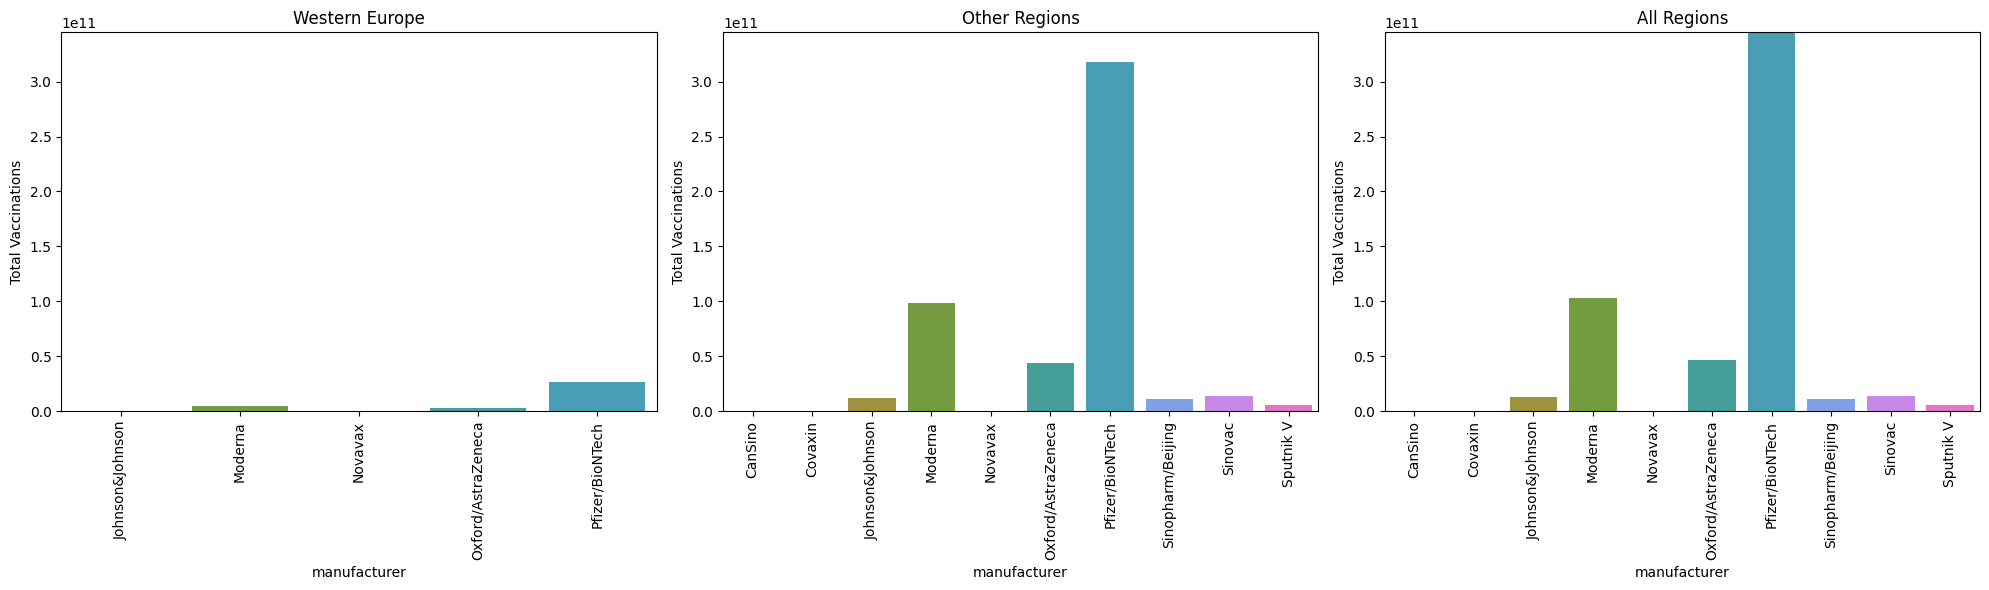

In [4]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby('manufacturer')['total_vaccinations'].sum()

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_data))
manufacturer_colors = dict(zip(all_data.index, color_palette))

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=western_data.index, y=western_data.values, ax=ax1,
            hue=western_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in western_data.index])
ax1.set_title('Western Europe')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot for Other Regions
sns.barplot(x=other_data.index, y=other_data.values, ax=ax2,
            hue=other_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in other_data.index])
ax2.set_title('Other Regions')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Plot for All Regions
sns.barplot(x=all_data.index, y=all_data.values, ax=ax3,
            hue=all_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in all_data.index])
ax3.set_title('All Regions')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Total Vaccinations')
ax3.set_ylim(0, max_y)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\1778851440.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\1778851440.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\1778851440.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)


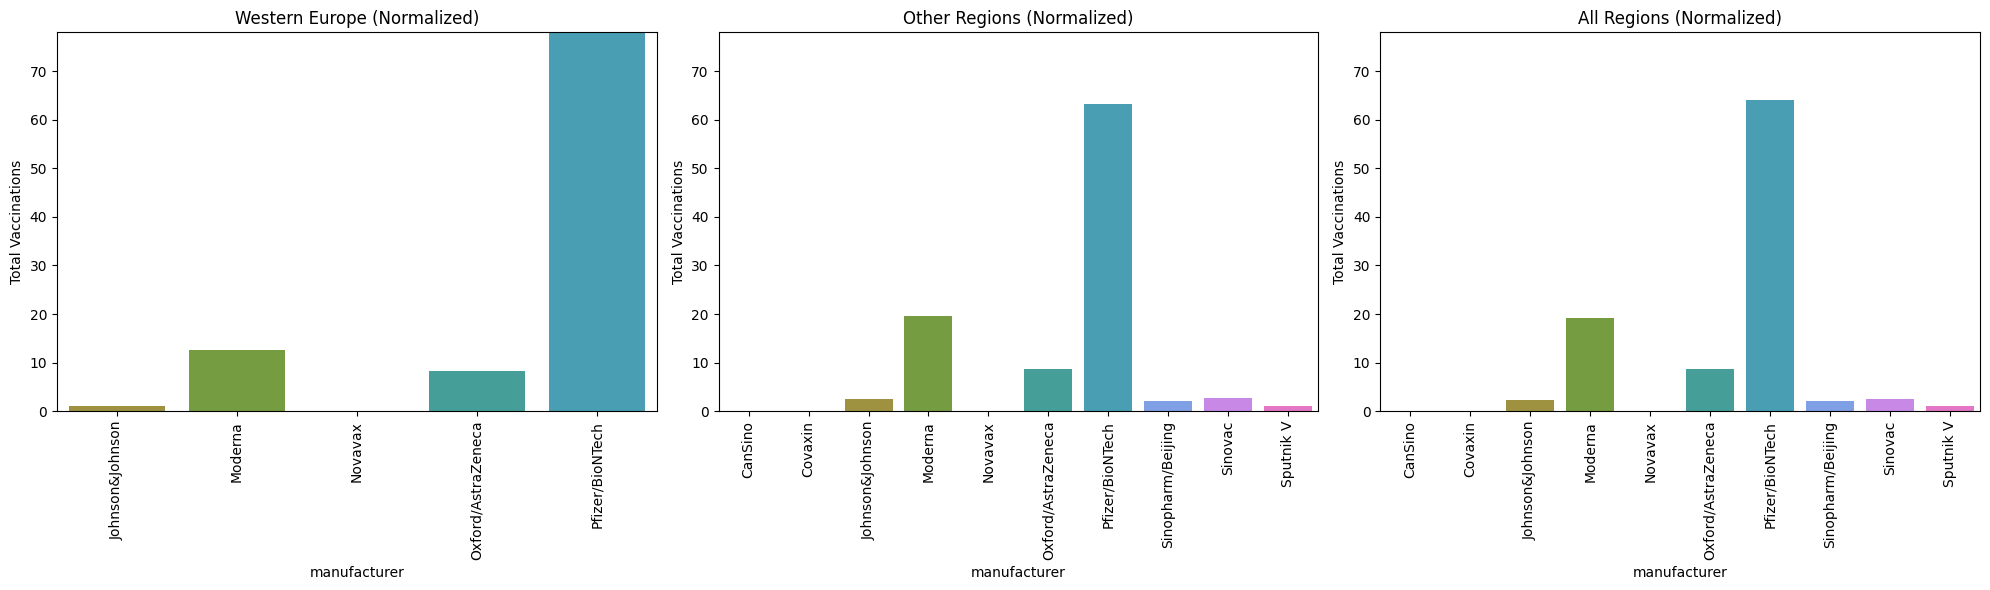

In [5]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Normalize data by converting to percentages
western_data = (western_data / western_data.sum()) * 100
other_data = (other_data / other_data.sum()) * 100
all_data = (all_data / all_data.sum()) * 100


# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_data))
manufacturer_colors = dict(zip(all_data.index, color_palette))

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=western_data.index, y=western_data.values, ax=ax1,
            hue=western_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in western_data.index])
ax1.set_title('Western Europe (Normalized)')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot for Other Regions
sns.barplot(x=other_data.index, y=other_data.values, ax=ax2,
            hue=other_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in other_data.index])
ax2.set_title('Other Regions (Normalized)')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Plot for All Regions
sns.barplot(x=all_data.index, y=all_data.values, ax=ax3,
            hue=all_data.index, legend=False,
            palette=[manufacturer_colors[m] for m in all_data.index])
ax3.set_title('All Regions (Normalized)')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Total Vaccinations')
ax3.set_ylim(0, max_y)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Performance of Vaccination

## Vaccination Performance Analysis by Manufacturer

We'll analyze manufacturer performance using several metrics:

1. **Total vaccinations**: Raw number of vaccinations administered by manufacturer
2. **Geographic reach**: Number of countries using each manufacturer's vaccines
3. **Market share**: Percentage of global vaccinations by manufacturer
4. **Temporal adoption**: Rate of vaccine adoption over time
5. **Regional performance**: Comparison of vaccine usage in Western Europe vs. other regions

In [6]:
# Examine the vaccination_by_manufacturer dataframe
print("Columns:", vaccination_by_manufacturer.columns.tolist())
print("\nFirst few rows:")
vaccination_by_manufacturer.head()

Columns: ['country', 'date', 'manufacturer', 'total_vaccinations', 'is_western_europe']

First few rows:


,country,date,manufacturer,total_vaccinations,is_western_europe
0,Argentina,2020-12-29,Moderna,2,False
1,Argentina,2020-12-29,Oxford/AstraZeneca,3,False
2,Argentina,2020-12-29,Sinopharm/Beijing,1,False
3,Argentina,2020-12-29,Sputnik V,20481,False
4,Argentina,2020-12-30,Moderna,2,False


In [7]:
# 1. Total vaccinations by manufacturer
total_by_manufacturer = vaccination_by_manufacturer.groupby('manufacturer')['total_vaccinations'].sum().sort_values(ascending=False)

# 2. Geographic reach: Number of countries using each manufacturer's vaccines
geographic_reach = vaccination_by_manufacturer.groupby('manufacturer')['country'].nunique().sort_values(ascending=False)

# Create a DataFrame with both metrics
performance_df = pd.DataFrame({
    'Total Vaccinations': total_by_manufacturer,
    'Countries Reached': geographic_reach
})

# Calculate market share percentage
performance_df['Market Share (%)'] = (performance_df['Total Vaccinations'] / performance_df['Total Vaccinations'].sum() * 100).round(2)

# Sort by total vaccinations
performance_df = performance_df.sort_values('Total Vaccinations', ascending=False)

# Display the performance metrics
print("\nVaccination Performance by Manufacturer:")
performance_df


Vaccination Performance by Manufacturer:


,Total Vaccinations,Countries Reached,Market Share (%)
manufacturer,,,
Pfizer/BioNTech,344835955037,43,64.18
Moderna,103072147621,37,19.18
Oxford/AstraZeneca,46451509497,37,8.65
Sinovac,13407163275,8,2.50
Johnson&Johnson,12611375881,35,2.35
Sinopharm/Beijing,10877006517,7,2.02
Sputnik V,5787343199,4,1.08
CanSino,271397675,3,0.05
Novavax,8268113,18,0.00


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\1648546527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Total Vaccinations'],
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\1648546527.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['Countries Reached'],


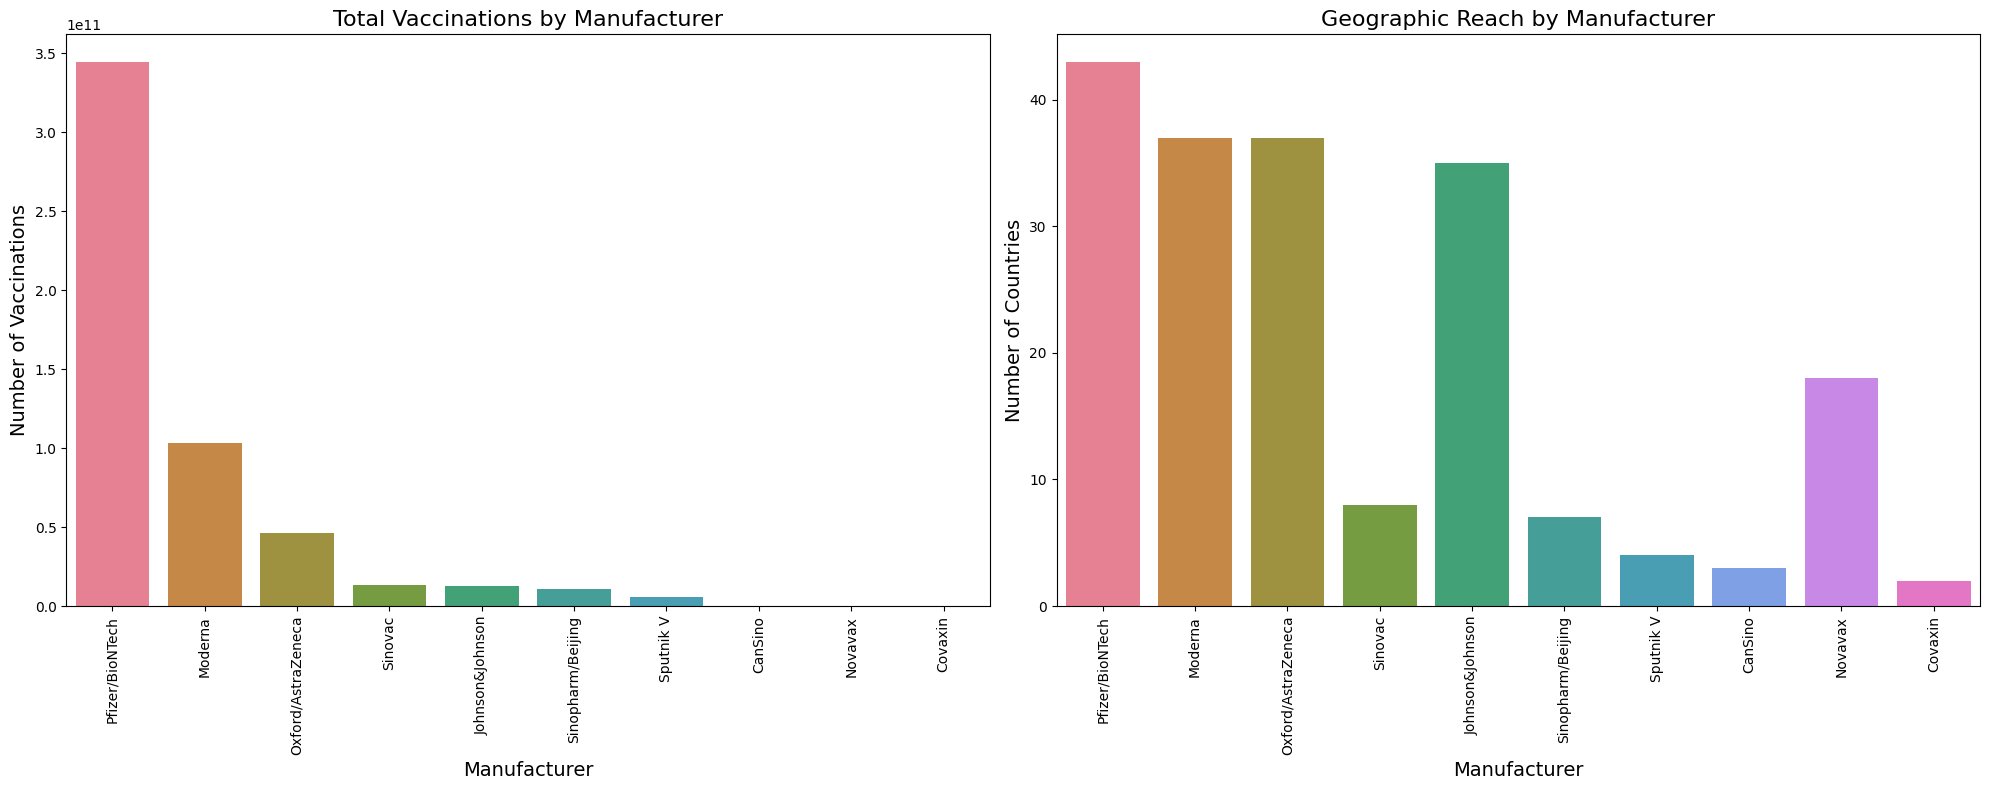

In [8]:
# Create a color palette
colors = sns.color_palette('husl', n_colors=len(performance_df))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Plot total vaccinations
sns.barplot(x=performance_df.index, y=performance_df['Total Vaccinations'], 
            palette=colors, ax=ax1)
ax1.set_title('Total Vaccinations by Manufacturer', fontsize=16)
ax1.set_ylabel('Number of Vaccinations', fontsize=14)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# 2. Plot geographic reach
sns.barplot(x=performance_df.index, y=performance_df['Countries Reached'], 
            palette=colors, ax=ax2)
ax2.set_title('Geographic Reach by Manufacturer', fontsize=16)
ax2.set_ylabel('Number of Countries', fontsize=14)
ax2.set_xlabel('Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

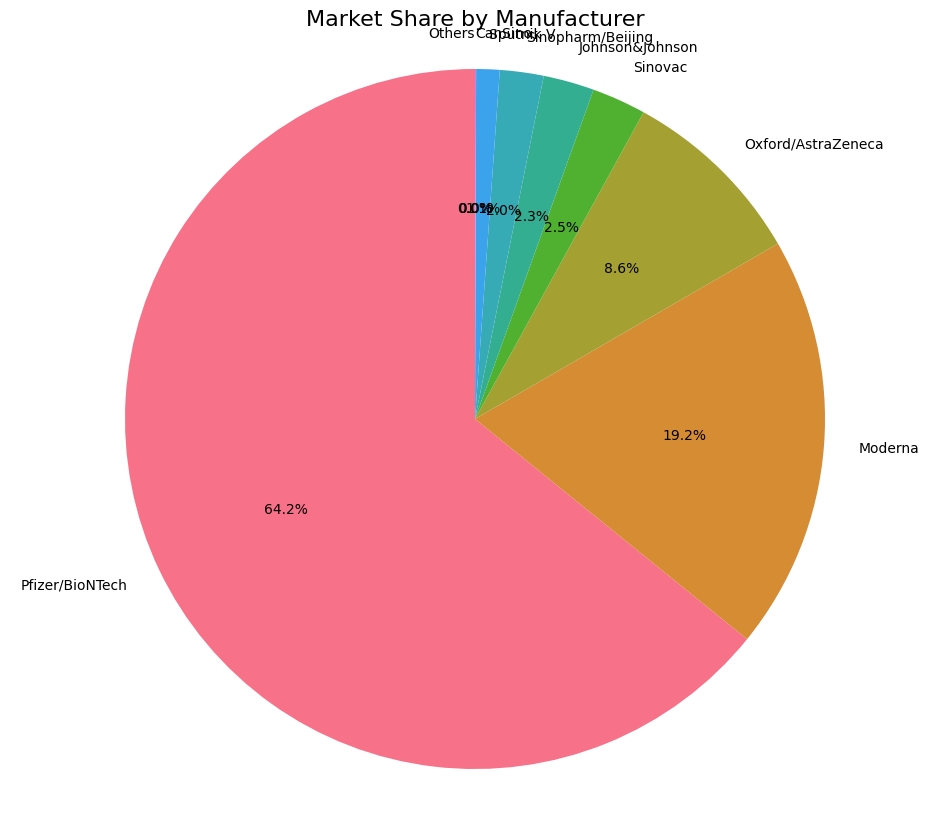

In [9]:
# Create a pie chart for market share
plt.figure(figsize=(12, 10))

# Keep only the top 8 manufacturers, group the rest as "Others"
top_n = 8
top_manufacturers = performance_df.iloc[:top_n].copy()
others = pd.DataFrame({
    'Total Vaccinations': [performance_df.iloc[top_n:]['Total Vaccinations'].sum()],
    'Market Share (%)': [performance_df.iloc[top_n:]['Market Share (%)'].sum()]
}, index=['Others'])

pie_data = pd.concat([top_manufacturers, others])

# Create a pie chart
plt.pie(pie_data['Market Share (%)'], labels=pie_data.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('husl', n_colors=len(pie_data)))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Market Share by Manufacturer', fontsize=16)
plt.show()

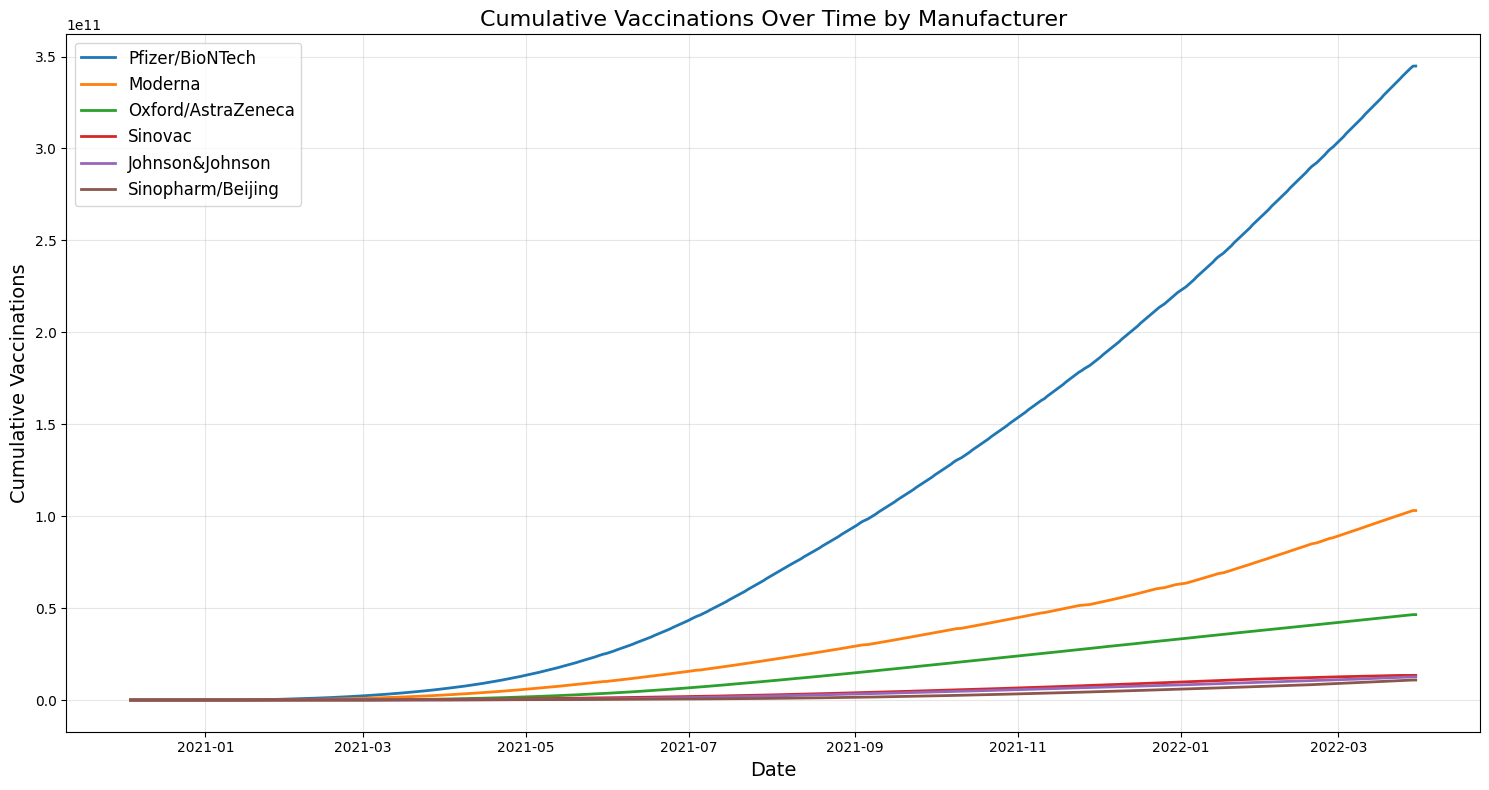

In [10]:
# Analyze vaccine adoption over time for top manufacturers
# Convert date to datetime format
vaccination_by_manufacturer['date'] = pd.to_datetime(vaccination_by_manufacturer['date'])

# Get top 6 manufacturers by total vaccinations
top_manufacturers = total_by_manufacturer.nlargest(6).index.tolist()

# Group by date and manufacturer, and sum vaccinations
temporal_data = vaccination_by_manufacturer[vaccination_by_manufacturer['manufacturer'].isin(top_manufacturers)]
temporal_data = temporal_data.groupby(['date', 'manufacturer'])['total_vaccinations'].sum().reset_index()

# Create a cumulative sum for each manufacturer over time
cumulative_data = temporal_data.pivot(index='date', columns='manufacturer', values='total_vaccinations')
cumulative_data = cumulative_data.fillna(0).cumsum()

# Plot the adoption curves
plt.figure(figsize=(15, 8))
for manufacturer in top_manufacturers:
    if manufacturer in cumulative_data.columns:
        plt.plot(cumulative_data.index, cumulative_data[manufacturer], label=manufacturer, linewidth=2)

plt.title('Cumulative Vaccinations Over Time by Manufacturer', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Vaccinations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Regional performance comparison
# Calculate total vaccinations for each manufacturer by region
western_europe = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]
other_regions = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']]

# Group by manufacturer and calculate total vaccinations for each region
western_europe_totals = western_europe.groupby('manufacturer')['total_vaccinations'].sum()
other_regions_totals = other_regions.groupby('manufacturer')['total_vaccinations'].sum()

# Create a DataFrame with both metrics
regional_performance = pd.DataFrame({
    'Western Europe': western_europe_totals,
    'Other Regions': other_regions_totals
})

# Calculate the percentage share in each region
regional_performance['Western Europe (%)'] = (regional_performance['Western Europe'] / regional_performance['Western Europe'].sum() * 100).round(2)
regional_performance['Other Regions (%)'] = (regional_performance['Other Regions'] / regional_performance['Other Regions'].sum() * 100).round(2)

# Sort by total vaccinations
regional_performance = regional_performance.fillna(0).sort_values('Western Europe', ascending=False)

# Display the regional performance metrics
print("\nRegional Performance by Manufacturer:")
regional_performance


Regional Performance by Manufacturer:


,Western Europe,Other Regions,Western Europe (%),Other Regions (%)
manufacturer,,,,
Pfizer/BioNTech,2.692859e+10,317907366958,78.03,63.23
Moderna,4.340357e+09,98731790546,12.58,19.64
Oxford/AstraZeneca,2.884395e+09,43567114794,8.36,8.66
Johnson&Johnson,3.584532e+08,12252922704,1.04,2.44
Novavax,9.620000e+02,8267151,0.00,0.00
CanSino,0.000000e+00,271397675,0.00,0.05
Covaxin,0.000000e+00,3572,0.00,0.00
Sinopharm/Beijing,0.000000e+00,10877006517,0.00,2.16
Sinovac,0.000000e+00,13407163275,0.00,2.67


C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\629064272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_western.index, y=top_western['Western Europe (%)'],
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\629064272.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_other.index, y=top_other['Other Regions (%)'],


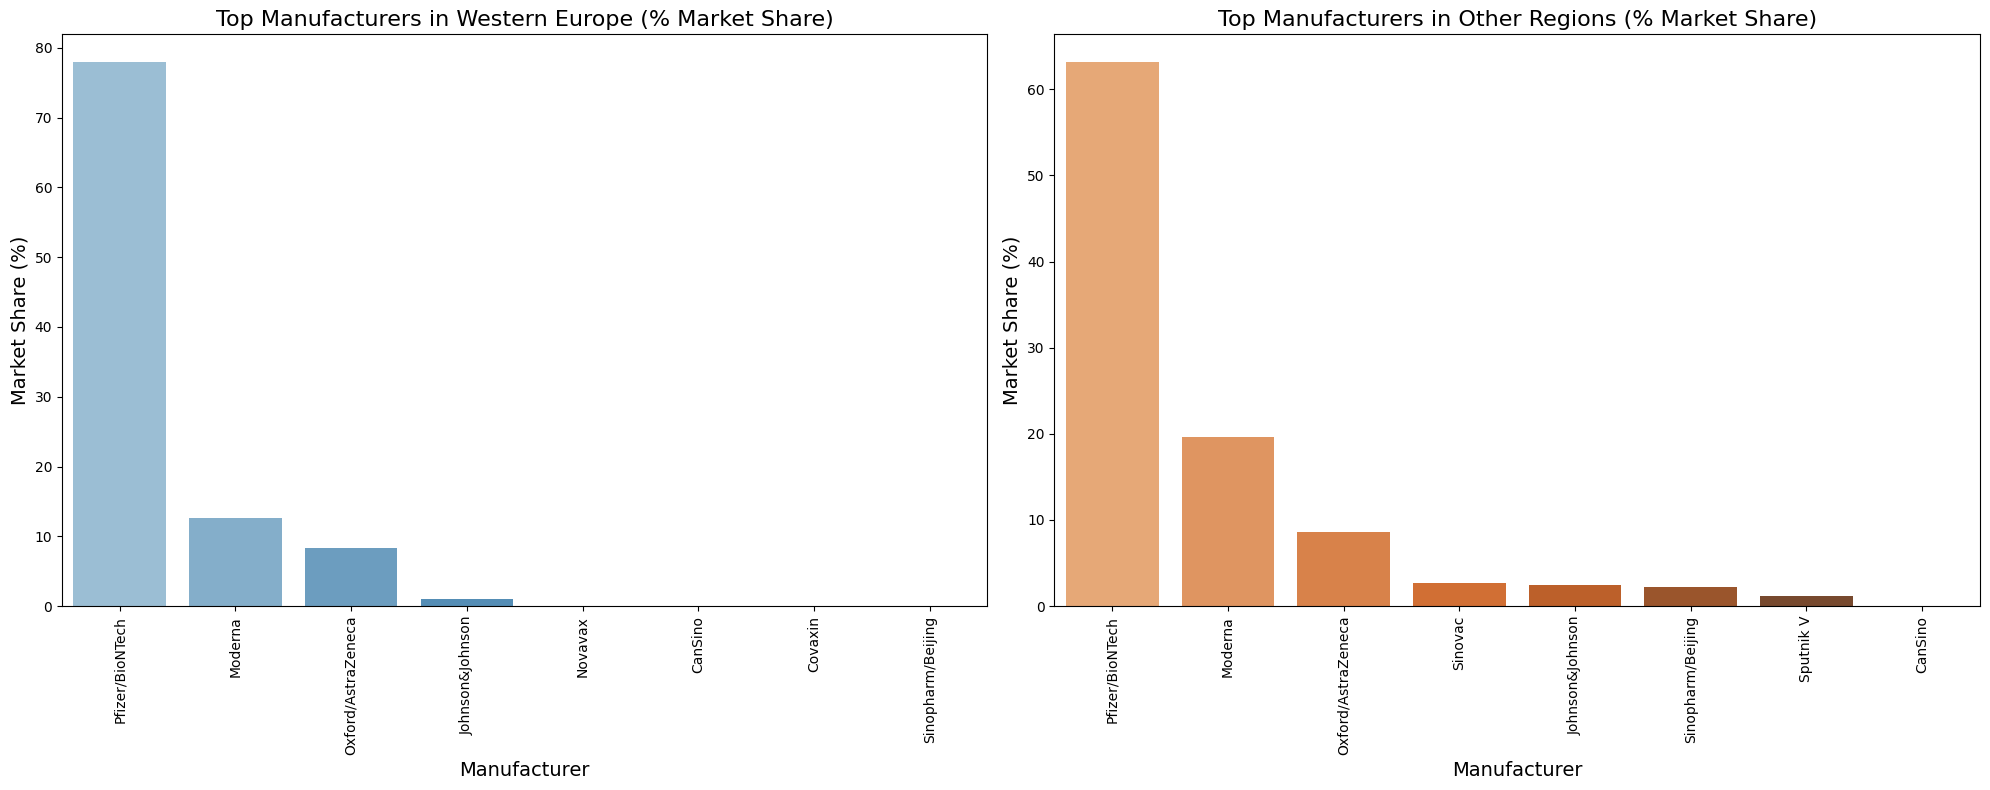

In [12]:
# Create a figure with two subplots for regional performance comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Filter for top manufacturers for cleaner visualization
top_n = 8
top_western = regional_performance.nlargest(top_n, 'Western Europe')
top_other = regional_performance.nlargest(top_n, 'Other Regions')

# Plot for Western Europe
sns.barplot(x=top_western.index, y=top_western['Western Europe (%)'], 
            palette=sns.color_palette('Blues_d', n_colors=len(top_western)), ax=ax1)
ax1.set_title('Top Manufacturers in Western Europe (% Market Share)', fontsize=16)
ax1.set_ylabel('Market Share (%)', fontsize=14)
ax1.set_xlabel('Manufacturer', fontsize=14)
ax1.tick_params(axis='x', rotation=90)

# Plot for Other Regions
sns.barplot(x=top_other.index, y=top_other['Other Regions (%)'], 
            palette=sns.color_palette('Oranges_d', n_colors=len(top_other)), ax=ax2)
ax2.set_title('Top Manufacturers in Other Regions (% Market Share)', fontsize=16)
ax2.set_ylabel('Market Share (%)', fontsize=14)
ax2.set_xlabel('Manufacturer', fontsize=14)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

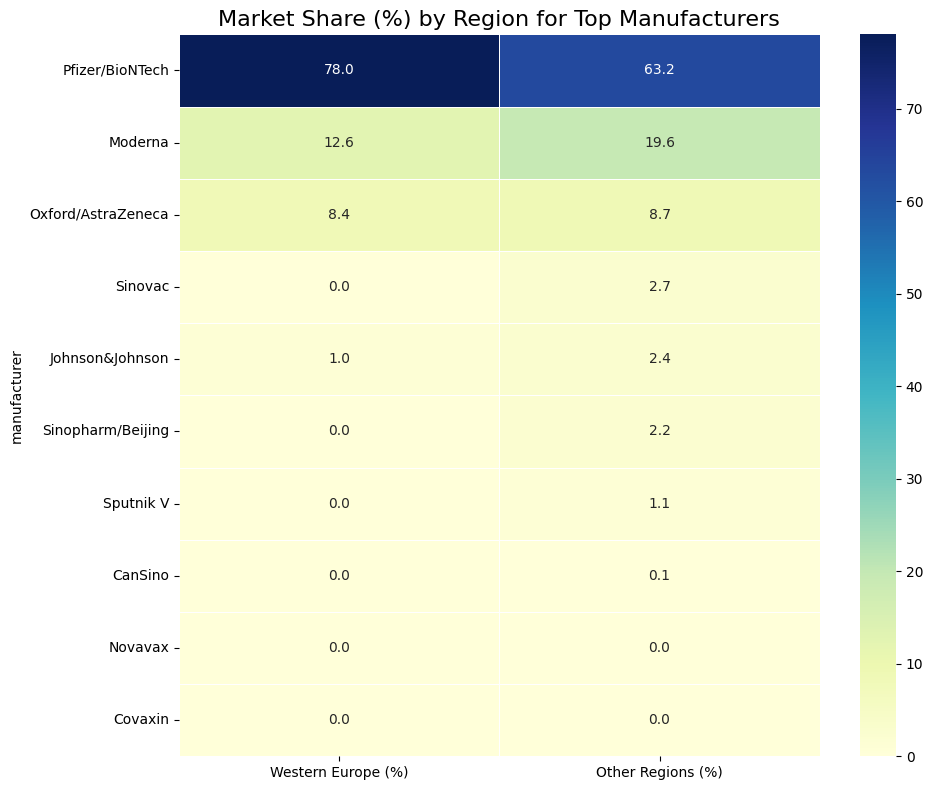

In [13]:
# Create a heatmap to compare market share percentages across regions
# Select top 10 manufacturers by total global vaccinations
top_manufacturers = performance_df.head(10).index.tolist()
regional_heatmap_data = regional_performance.loc[top_manufacturers, ['Western Europe (%)', 'Other Regions (%)']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(regional_heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Market Share (%) by Region for Top Manufacturers', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_8260\4192823871.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=effectiveness_df.index, y=effectiveness_df['Vaccinations per Country'],


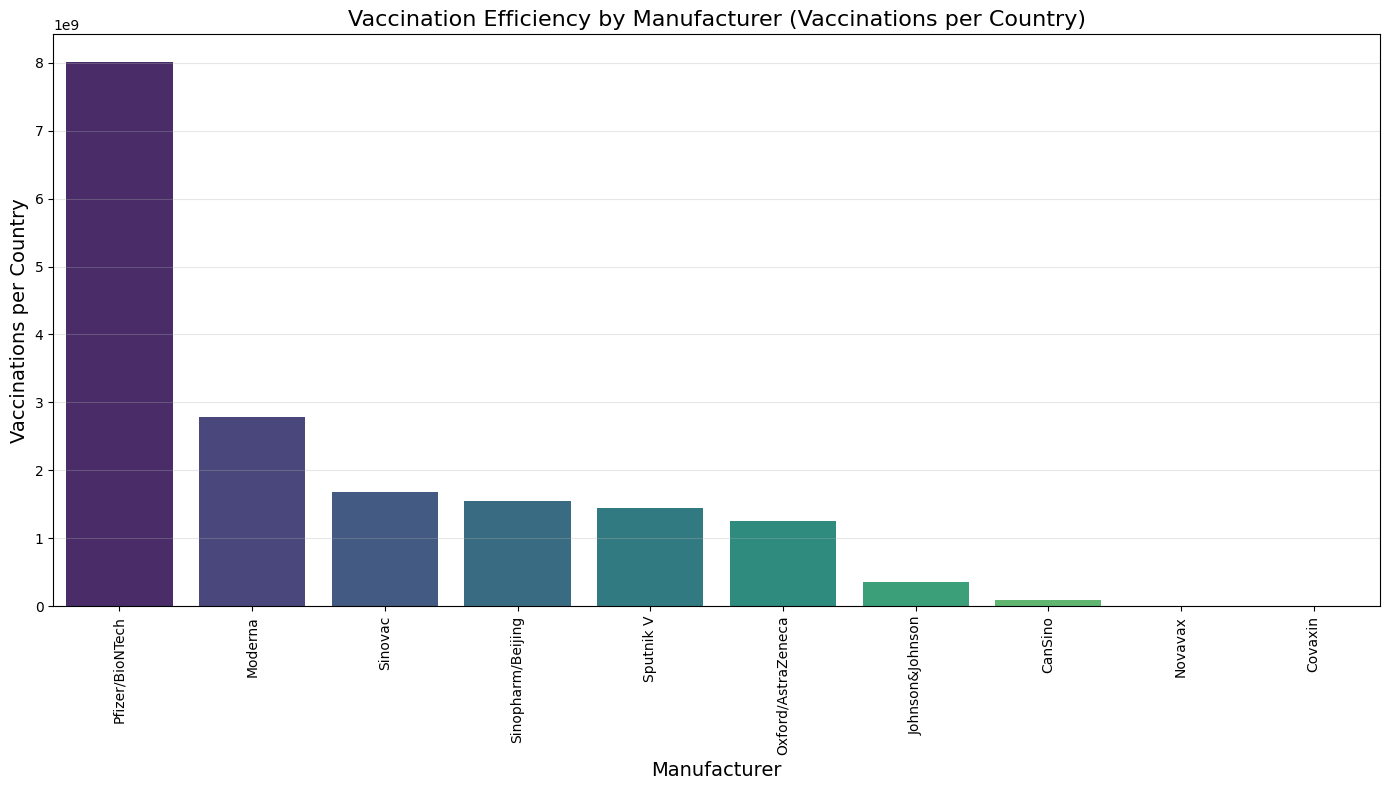

In [14]:
# Create a performance indicator: Effectiveness ratio
# Effectiveness ratio = Vaccinations per country (reach efficiency)
performance_df['Vaccinations per Country'] = (performance_df['Total Vaccinations'] / performance_df['Countries Reached']).round(0)

# Sort by the new metric
effectiveness_df = performance_df.sort_values('Vaccinations per Country', ascending=False)

# Plot the effectiveness ratio
plt.figure(figsize=(14, 8))
sns.barplot(x=effectiveness_df.index, y=effectiveness_df['Vaccinations per Country'], 
            palette=sns.color_palette('viridis', n_colors=len(effectiveness_df)))
plt.title('Vaccination Efficiency by Manufacturer (Vaccinations per Country)', fontsize=16)
plt.ylabel('Vaccinations per Country', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Create a composite performance score
# Normalize each metric to a 0-100 scale
from sklearn.preprocessing import MinMaxScaler

# Select the metrics to include in the performance score
metrics = ['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country']

# Create a copy of the data for scaling
scaled_df = performance_df.copy()

# Scale each metric to 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
for metric in metrics:
    scaled_df[f'{metric} (scaled)'] = scaler.fit_transform(performance_df[[metric]]).flatten()

# Calculate the composite score (equal weighting for simplicity)
scaled_df['Performance Score'] = scaled_df[[f'{metric} (scaled)' for metric in metrics]].mean(axis=1).round(2)

# Sort by the performance score
scaled_df = scaled_df.sort_values('Performance Score', ascending=False)

# Display the performance scores
print("\nOverall Performance Score by Manufacturer:")
scaled_df[['Total Vaccinations', 'Countries Reached', 'Vaccinations per Country', 'Performance Score']]


Overall Performance Score by Manufacturer:


,Total Vaccinations,Countries Reached,Vaccinations per Country,Performance Score
manufacturer,,,,
Pfizer/BioNTech,344835955037,43,8.019441e+09,100.00
Moderna,103072147621,37,2.785734e+09,50.00
Oxford/AstraZeneca,46451509497,37,1.255446e+09,38.16
Johnson&Johnson,12611375881,35,3.603250e+08,29.55
Sinovac,13407163275,8,1.675895e+09,13.14
Novavax,8268113,18,4.593400e+05,13.01
Sinopharm/Beijing,10877006517,7,1.553858e+09,11.58
Sputnik V,5787343199,4,1.446836e+09,8.20
CanSino,271397675,3,9.046589e+07,1.22
